# El planteamiento del ejercicio es el siguiente:

El archivo transaccional_muestra.csv contiene un mes de transacciones de una empresa de retail; es un ejemplo similar a los datos con los que trabajamos habitualmente. En este ejercicio te pedimos lo siguiente:

## 1. Primero dale una mirada a los datos para familiarizarte con ellos; los nombres de las columnas son auto explicativos.</b>


In [1180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1181]:
# Convistiendo el archivo .csv a data frame df. 
df = pd.read_csv("transaccional_muestra.csv")

<b> Para familiarse con los datos podemos usar .info, .head, .describe como se muestra a continaucion. </b>
<!-- Para familiarse con los datos podemos usar .info, .head, .describe como se muestra a continaucion.  -->

In [1182]:
# Para familiarse con los datos podemos usar .info, .head, .describe como se muestra a continaucion. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266617 entries, 0 to 266616
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_transaccion  266617 non-null  int64  
 1   id_fecha        266617 non-null  object 
 2   id_tienda       266617 non-null  int64  
 3   id_cliente      266617 non-null  object 
 4   monto           266617 non-null  float64
 5   unidades        266617 non-null  int64  
 6   id_producto     266617 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 14.2+ MB


In [1183]:
# Valores representativos para el analisis de manera rapida
df.describe()

,id_transaccion,id_tienda,monto,unidades,id_producto
count,2.666170e+05,266617.000000,266617.000000,266617.000000,2.666170e+05
mean,8.168497e+04,10.128038,40.747171,1.035778,2.116181e+05
std,1.313679e+05,9.621381,86.104906,0.452394,3.480063e+05
min,0.000000e+00,1.000000,-3554.935162,1.000000,0.000000e+00
25%,3.881000e+04,3.000000,10.674900,1.000000,2.611000e+03
50%,7.705900e+04,7.000000,22.841575,1.000000,2.542700e+04
75%,1.168780e+05,12.000000,42.656136,1.000000,2.149330e+05
max,4.237486e+06,49.000000,3554.935162,53.000000,1.313809e+06


In [1184]:
# Imprimiendo las primeros 5 lineas (rows)
df.head()

,id_transaccion,id_fecha,id_tienda,id_cliente,monto,unidades,id_producto
0,3420,2018-03-02,1,14e8e09751058711deec7f160f2b34ec,9.176690,1,3523
1,2293,2018-03-02,11,bca2a43470e6f1097013d8a01ad2df73,16.691722,1,4883
2,2519,2018-03-02,1,a0b7648eed7a4f1da33f7de962f104b1,500.985471,1,209
3,2520,2018-03-02,1,546d432da6034e5a355c92192c09c687,30.043430,1,1127
4,3457,2018-03-02,1,14e8e09751058711deec7f160f2b34ec,9.176690,1,23945


De la tabla anterior podemos ver que tenemos diferentes tiendas.\
Como un punto de partida yo analizaria la tienda, el producto, y el cliente mas repetidos en esta data.. 

In [1185]:
# Las 5 tiendas que mas aparecen en la data.
new_df_t = df['id_tienda'].value_counts().head(100).rename_axis('id_tienda').reset_index(name='veces encontrado')
new_df_t

,id_tienda,veces encontrado
0,3,40724
1,6,30215
2,4,26433
3,34,24343
4,12,22500
5,10,19255
6,1,15899
7,13,13217
8,16,13214
9,2,12864


In [1186]:
# Los clientes que mas aparecen en la data.
new_df_c = df['id_cliente'].value_counts().rename_axis('id_cliente').reset_index(name='cantidad encontrada')
new_df_c

,id_cliente,cantidad encontrada
0,14e8e09751058711deec7f160f2b34ec,80541
1,57aad9040e3a5406451afbac74573782,352
2,445055d84c2814b3eeac6261f6a93866,312
3,256d3bf9e859eb808ecc6d72d4151405,273
4,b183a2bb644e8cbc56f263631634e438,106
...,...,...
65428,c14da27b398b11943fd009da69c4d866,1
65429,8ef9b8f4308ae44ae50bf8707ab5c524,1
65430,ff8174d4dcb03c815998fbf108cd6064,1
65431,64658ae26a2a4a9e8fe6764407c9e102,1


In [1187]:
# Los productos mas repetidos.
df['id_producto'].value_counts().head()
new_df_p = df['id_producto'].value_counts().rename_axis('id_producto').reset_index(name='cantidad encontrado')
new_df_p

,id_producto,cantidad encontrado
0,2611,11116
1,6067,5737
2,271,3513
3,40,2749
4,759,2733
...,...,...
14325,418121,1
14326,656251,1
14327,187580,1
14328,51612,1


##    Podemos observar lo siguiente:

<br>

<li>Diferentes tiendas.</li>
<li> Se realizaron 266617 transaciones/mes.</li>
<li>La columna monto tiene valores negativos.</li>
<li>El monto mayor fue 3554 y misma cantidad pero en negativo. Requiere analisis.</li>
<li>Solo hay 6 columnas de las cuales 4 corresponde a identificaciones (id).</li>
<li>La unidad maximas por transacion fue 53.</li>
<li>Hay 19 tiendas.</li>
<li>El id de la ultima tienda es 49.</li>
<li>Hay 65432 clientes.</li>
<li>Hay 14329 productos.</li>
<li>A este punto la data no tiene valores sin datos, nulos (null).</li>

Se generan otras preguntas como:

    1) En que tienda compra mas x cliente?.
    2) X producto en que tieda se vende mas?.
    3) Cuanto dinero genera x tienda?
    4) Cuanto dinero gasta x tienda/mes comparado con la tienda que mas vende. 
    5) Cuanto dinero gasta la tienda que mas vende. 

Que seran contestadas al final del proyecto.

## 2. ¿Hay outliers? Si hay, identifícalos y explica por qué los consideraste así.




La unicas columnas que padrian tener data para analizar si tienen outliers son monto y unidades. 
Este analisis se puede realizar analizando la data como un todo tomando las 266617 transaciones o agrupandolas de acuerdo a la tienda, cliente o producto. 

#### Primer caso data completa:
Hay varios metodos para determinar outliers el mas comun boxplot. El outlier en este caso esta determinado por estar fuera del minimo punto y maximo punto. El minimo y maximo punto esta determinado por estar 25% lejano al Q1 y Q3 respectivamente, como se muestra a continuacion. 



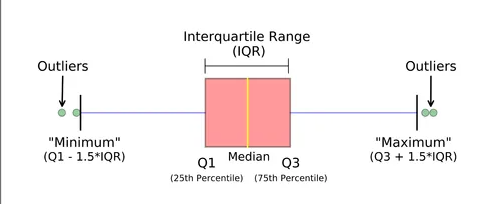

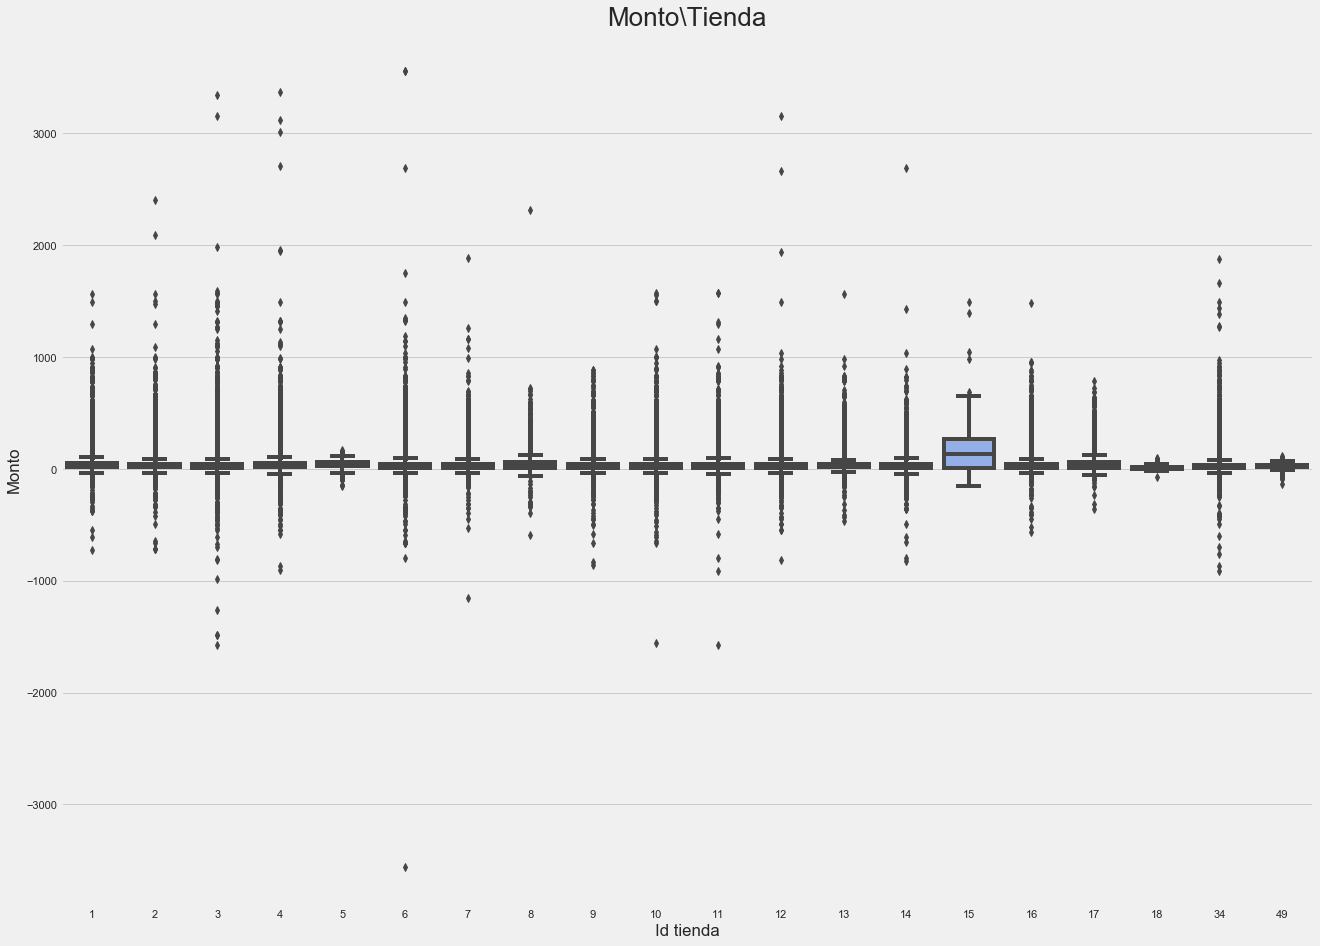

In [1188]:
# Box plots to visualize distributions

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
sns.boxplot(y = 'monto', x = 'id_tienda', data = df)
plt.title('Monto\Tienda', fontsize = 26)
plt.ylabel('Monto')
plt.xlabel('Id tienda')
plt.show()

### Evidentemente tenemos outliers en toda la data. 
Quiero ver la representacion grafica de los montos por tienda por tal motivo voy a graficarlos.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


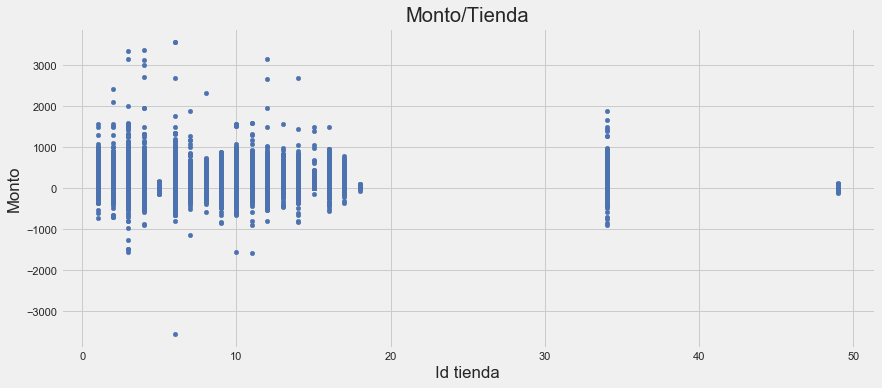

In [1189]:
ax = df.plot(y='monto', x='id_tienda', kind='scatter',  legend = True, figsize = (13,5.5))
ax.set_title('Monto/Tienda')
plt.ylabel('Monto')
plt.xlabel('Id tienda')
plt.show()

# 3. Trabajando sólo con los datos que correspondan a compras:
 3.1. Calcula el indicador "Transacciones por cliente" para cada tienda, y describe la distribución del indicador
 
 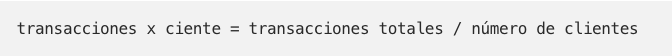
 
 Describe la capacidad para lograr que sus clientes regresen a comprar N número de veces.\
<!--   -->
 ### Para realizar esto voy a crear un nueva dataframe llamado df_transaciones donde se pueda visualizar el id_tienda y indicador transaciones por cliente.

In [1190]:
df_transaciones = pd.DataFrame(columns=['id_tienda', "Transacciones por cliente"])

# Asumiendo que los montos positivos representan las compras
df_negativo = df[df["monto"]<0]
df = df[df["monto"]>0]


for i in new_df_t["id_tienda"]:
    new_data = df[df["id_tienda"]==i]
    clientes = new_data["id_cliente"].nunique()
    transaciones = new_data.size
    transacciones_cliente = round(transaciones / clientes)
    df_transaciones.loc[i] = [i, transacciones_cliente]

df_transaciones = df_transaciones.set_index("id_tienda").reset_index().sort_values(
    by=["Transacciones por cliente"], ascending=False)

# 3.2. Calcula el indicador "Ticket promedio" (es decir, el monto total promedio por cada transacción) para cada tienda.

 ### Para realizar esto voy a crear un nueva dataframe llamado df_ticket donde se pueda visualizar el id_tienda y indicador Ticket_promedio.


In [1191]:
df_ticket = pd.DataFrame(columns=['id_tienda', "Ticket_promedio"])

for i in new_df_t["id_tienda"]:
    montos = df.loc[df["id_tienda"] == i, 'monto'].sum()
    new_data = df[df["id_tienda"]==i]
    clientes = new_data["id_cliente"].nunique()
    ticket_promedio = round(montos / clientes)
    df_ticket.loc[i] = [i, ticket_promedio]

df_ticket = df_ticket.set_index("id_tienda").reset_index().sort_values(by=["Ticket_promedio"])

###  Voy a unir los dos dataframes para contestar ambas respuesta en una sola tabla y grafica.

In [1192]:
df_graph = df_transaciones.join(df_ticket.set_index('id_tienda'), on='id_tienda').set_index("id_tienda")
df_graph

,Transacciones por cliente,Ticket_promedio
id_tienda,,
10.0,58.0,354.0
9.0,41.0,265.0
34.0,39.0,185.0
5.0,36.0,239.0
2.0,35.0,244.0
17.0,29.0,288.0
12.0,28.0,166.0
13.0,28.0,166.0
1.0,27.0,196.0


###   3.2.1. ¿A qué se puede deber las diferencias en ticket promedio entre las distintas tiendas
Factores como productos disponibles, hubicacion, precio, tipo de cliente pueden afectar estos indicadores.\
Analisemos la disponiblidad de productos y la diferencia de precios para el mismo producto entre la diversas tiendas considerando que solo venden los item que ya vendieron.

### Disponibilidad de productos

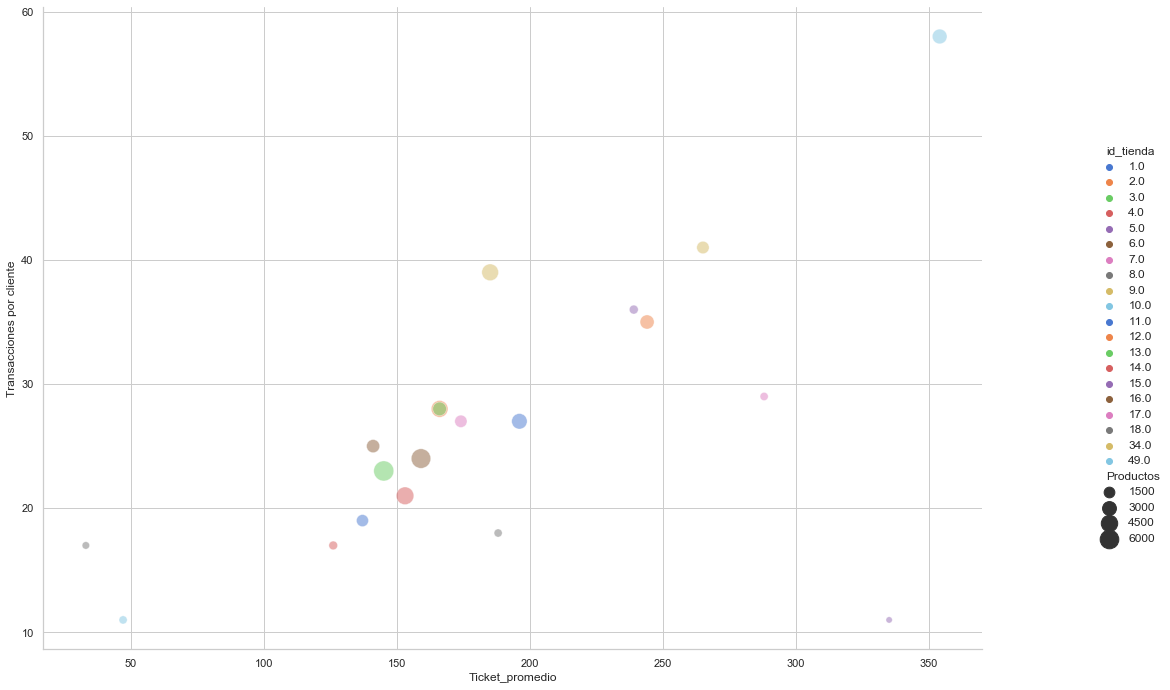

In [1193]:
df_productos = pd.DataFrame(columns=['id_tienda', "Productos"])
# Asumiendo que los montos positivos representan las compras

for i in new_df_t["id_tienda"]:
    new_data = df[df["id_tienda"]==i]
    productos = new_data["id_producto"].nunique()
    df_productos.loc[i] = [i, productos]

df_productos = df_productos.sort_values(by=["Productos"], ascending=False)
df_productos = df_graph.join(df_productos.set_index('id_tienda'), on='id_tienda')

sns.set_theme(style="whitegrid")
# Plot miles per gallon against horsepower with other semantics
t = sns.relplot(x="Ticket_promedio", y="Transacciones por cliente", hue="id_tienda", size="Productos",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_productos)
t.fig.set_figwidth(17)
t.fig.set_figheight(10)

Se interpreta que para tener un ticket promedio mayor a 140 usd y una transacion por cliente mayor a 20 se requiere tener un stock superior o igual a 600 articulos diferentes. Con exepcion de dos tiendas 7 y 5 que requieren otro tipo de analisis.


### Precio entre tiendas por mismo producto.

In [1194]:
# Reduciendo la data a donde las unidades compradas son una sola para simplicidad del precio
df_uni = df[df["unidades"] == 1]
df_id_productos = df_uni["id_producto"].unique()
len(df_id_productos.tolist())
# Tenemos un total de 14244 productos diferentes.

14244

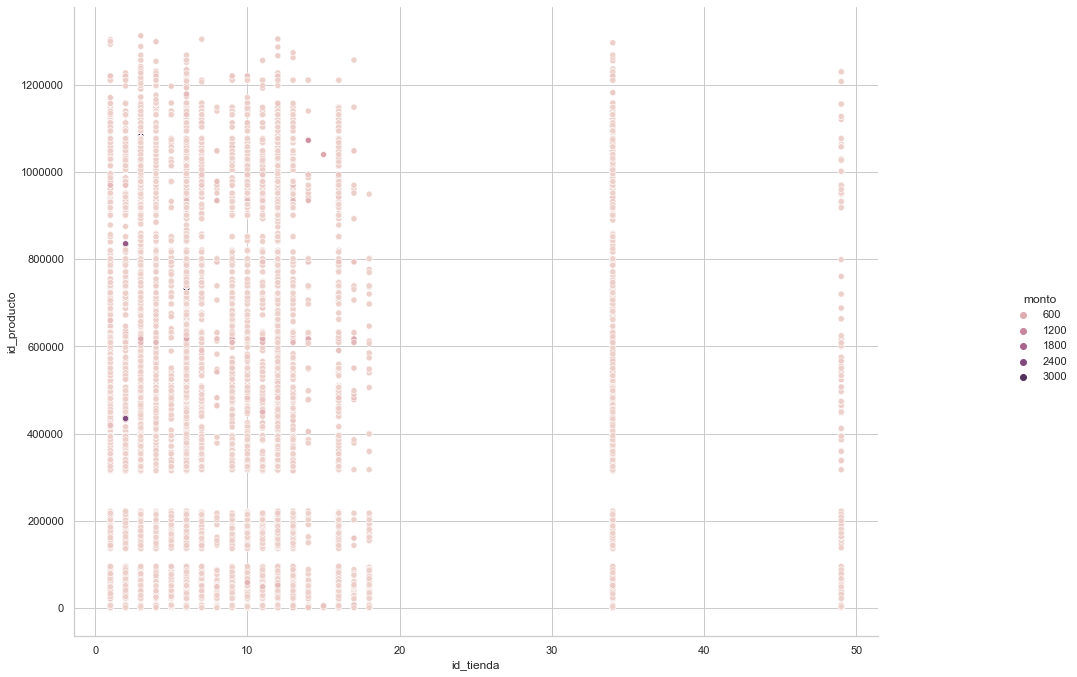

In [1195]:
g = sns.relplot(x="id_tienda", y="id_producto", hue="monto", data=df_uni);
g.fig.set_figwidth(17)
g.fig.set_figheight(10)

Se observa variacion de precios entre el mismo producto para diversas tiendas. Ahora pana analizar este comportamiento y ver si afecta el indice necesitaria analizar el comportamiento de compra de un mismo cliente entre diversas tiendas para el mismo producto. 

## 4. La compañía desea hacer una segmentación básica de sus clientes. La idea es determinar un segmento de los "clientes VIP", es decir, sus mejores clientes, versus el resto de los clientes.
4.1. Si sólo tuvieras acceso a estos datos, ¿cuál sería tu recomendación a la compañía? ¿Qué clientes elegirías y con qué parámetros los seleccionarías?\
Los dos principales escenarios para esta situacion son:
    <li>Gastadores</li>
    <li>Compradores frecuentes</li>


### Grandes Gastadores

Para analisar esto voy a crear una variable que usted pueda modificar de acuerdo a su criterio para determinar el punto donde usted considere se divida las personas que mas gantan de las que no. Dicha division sera la muntiplicacion  de la sumatoria total del monto comprado * porcentaje_equivalente. 

#### Nombre variable = porcentaje_equivalente

Por ejemplo:\
              division = monto_total * porcentaje_equivalente
              
El monto total es la suma de todos los montos positivos menos los montos negativos considerando que los montos negativos corresponde a retorno de algun producto.

In [1196]:
total_positivo = df["monto"].sum()
total_negativo = df_negativo["monto"].sum() 
monto_total = total_positivo + total_negativo
str = "El monto positivo es {}, el monto negativo es {}, el monto Total es {}"
print(str.format (total_positivo, total_negativo, monto_total))

El monto positivo es 11395654.43103316, el monto negativo es -531765.9663452666, el monto Total es 10863888.464687893


#### El resultado final sera una representacion grafica de todos los clientes con una linea divisoria de donde esta el monto que determina la diferencia entre los clientes que mas gastan de los que no. 

El id_cliente para el analisis posterior no es relevante dado que voy a filtrar los clientes por el monto gastado en el mes y Seaborn no puede interpretar la estructura del id actual voy a cambiar el id del cliente por un numero random. Al obtener el monto podemos filtrar los clientes nueamente con el monto obtenido y crear la lista de los clientes deseados (VIP).




Monto que divide los clientes VIP: 347.53886083252434
La cantidad de clientes para cubrir esta exigencia es: 3906 y la lista se encuentra en la variable clientes.


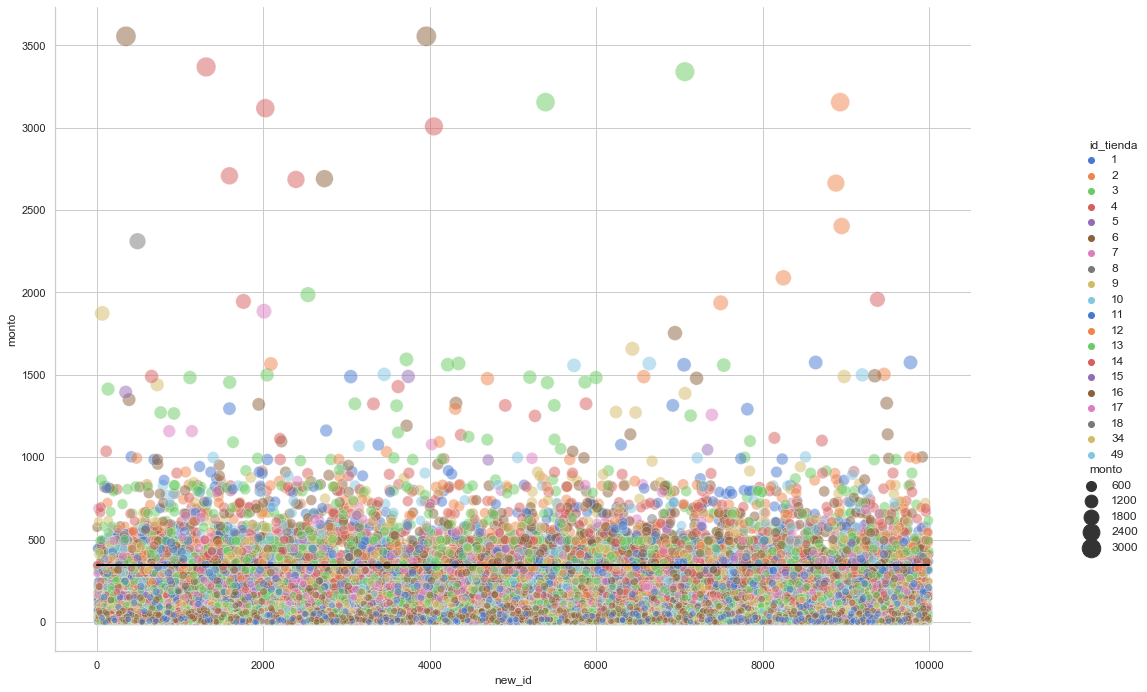

In [1197]:
porcentaje_equivalente = 0.2

# Agregando el id, debido a que solo quiero realizar una representacion grafica para determinar
import random
random.seed(42)

df = df.copy()
df['new_id']  = np.random.randint(1, 10000, df.shape[0])

df.sort_values(by=["monto"], ascending=False)
uniques_montos = sorted(df["monto"].unique().tolist(), reverse=True)

total_div = round(total*porcentaje_equivalente)

for each in uniques_montos:
    new_suma = df[df["monto"] >= each]
    suma = new_suma["monto"].sum()
    if suma >= total_div:
        monto_equi = each
        break

divisor_monto = monto_equi
clientes = df[df["monto"]>monto_equi]['id_cliente'].unique().tolist()

print("Monto que divide los clientes VIP:", divisor_monto)
print("La cantidad de clientes para cubrir esta exigencia es:", len(clientes), "y la lista se encuentra en la variable clientes.")

# Plot miles per gallon against horsepower with other semantics
sns.set_theme(style="whitegrid")
b = sns.relplot(x="new_id", y="monto", hue="id_tienda", size="monto",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.plot([0, 10000], [divisor_monto, divisor_monto], linewidth=2, color="black")
b.fig.set_figwidth(17)
b.fig.set_figheight(10)

### Quiero ver graficamente el aporte de cada una de las tiendas a esta division. 

In [1198]:
df_mayor = df[df["monto"] > divisor_monto]

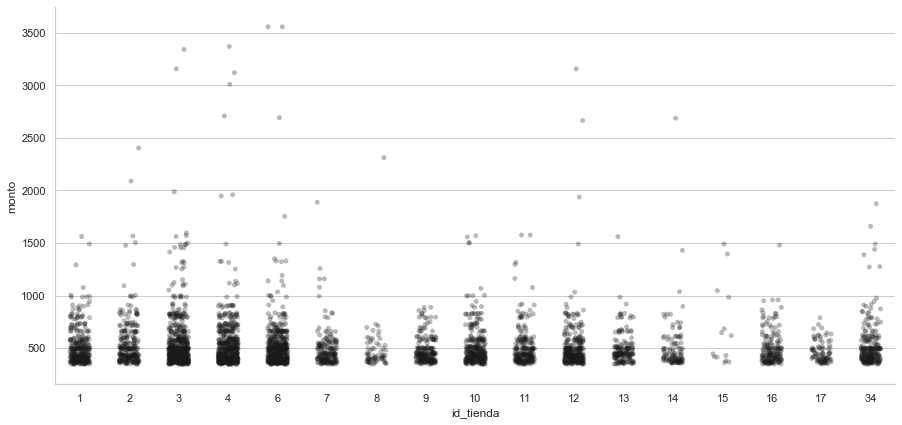

In [1199]:
d = sns.catplot(x='id_tienda', y='monto', data=df_mayor_20, alpha=0.3,jitter=0.2,color='k')
d.fig.set_figwidth(14)
d.fig.set_figheight(6)


Aporte de clientes por cada una de las tiendas.

### Compradores frecuentes

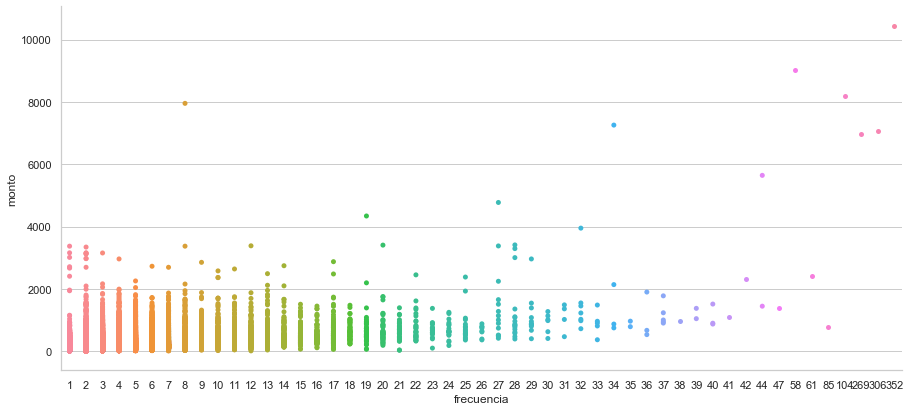

In [1245]:
df1 = df.groupby(["id_cliente"])['monto'].sum()
df2 = df.groupby(["id_cliente"])['id_cliente'].count()

result = pd.concat([df1, df2], axis=1, join='inner')
result.columns = ["monto", "frecuencia"]
result = result.sort_values(by=["frecuencia"], ascending=False).reset_index()

result = result.drop(result.index[0])
result

e = sns.catplot(x='frecuencia', y='monto', 
            data=result,
            jitter=False,
            height=4, aspect=1.5)

e.fig.set_figwidth(14)
e.fig.set_figheight(6)

Del mismo modo se pude separar de acuerdo al monto. Hay un outlier que tube qu eliminar motivado a que representaba una distorsion al grafico.


4.2. Si pudieras pedir más datos para poder hacer esta segmentación, ¿qué datos pedirías?

<li>Email</li>
<li>Sexo</li>
<li>Edad</li>
<li>Direccion</li>
<li>Income</li>
<li>Typo de producto</li>
<li>Categoria de productos</li>
<li>Color del producto</li>
<li>Hora de la compra</li>
<li>Medio de pago</li>
<li>email</li>